In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [5]:
x_mean  = np.mean(x_train)
y_mean = np.mean(y_train)

In [6]:
def linear_regression(feature_values, target_values):
   x = feature_values
   y = target_values
   n = d = 0
   for i, j in zip(x,y):
        n += (i - x_mean)*(j - y_mean)
        d += (x_mean - i)**2
   b0 = n/d
   b1 = y_mean - b0 * x_mean
    # print("y = ax + b")
    # print (f"a = {b0}  b = {b1}")
   return b0, b1

In [7]:
slope, intercept = linear_regression(x_train, y_train)
print("Slope = ", slope)
print("Intercept = ", intercept)

Slope =  [9312.57512673]
Intercept =  [26780.09915063]


In [10]:
def predict(v):
 pred = slope*v + intercept
 return pred 

In [11]:
len(x_test)
print(x_test)
print(y_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]
[ 37731. 122391.  57081.  63218. 116969. 109431.]


In [12]:
y_pred = []
for i in range(len(x_test)):
  y_pred = np.insert(y_pred, i, predict(x_test[i]))
print(x_test)
print(y_pred)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]
[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


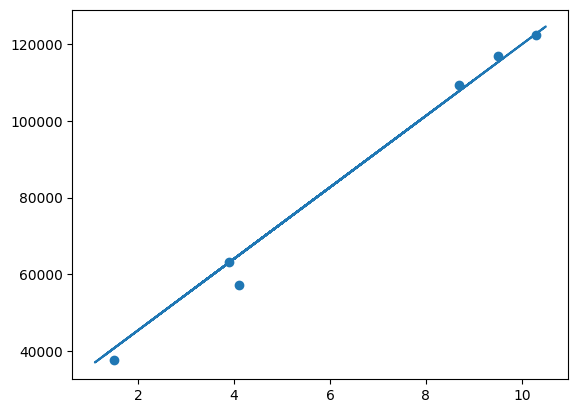

In [13]:
plt.scatter(x_test, y_test)
plt.plot(x_train, slope*x_train + intercept)

In [14]:
type(y_pred)

numpy.ndarray

In [15]:
def error(u, v):
  prediction = u*slope + intercept
  var = ((v - prediction) * (v - prediction)).sum()
  var = ((v - u) * (v - u)).sum()
  MSE = var/len(v)
  return MSE

In [16]:
from sklearn.metrics import mean_squared_error
# print('Accuracy: ', mean_squared_error(y_pred, y_test))
print('Accuracy: ', error(y_test, y_pred))

Accuracy:  12823412.298126549
